**This code Use the record as a whole and apply selection methods, classifier and precision score.**
1.using `pandas` to read in a CSV file of the data

2.Assigning Independents by the target column and the AR model P1 columns (1-8) from the DataFrame.

3.Assigning dependent with the target column.

In [1]:
import pandas as pd

file_path = r"C:\Users\smsm\wholedata.csv"
df = pd.read_csv(file_path)

independents=df.drop(['target','AR model P1 (1)','AR model P1 (2)','AR model P1 (3)','AR model P1 (4)'
,'AR model P1 (5)','AR model P1 (6)','AR model P1 (7)','AR model P1 (8)'],axis='columns')
dependent=df.target

 4.Import the needed libraries: `mlxtend.feature_selection`,`SequentialFeatureSelector`,`sklearn.svm` import` SVC` , `matplotlib.pyplot`,`mlxtend.plotting` ,`plot_sequential_feature_selection`

In [2]:
# Wrapper Methods for feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)



**Selection**

 5.use the `SequentialFeatureSelector `from the `mlxtend` library to perform sequential forward selection **(SFS)** for feature selection. 

 6.specify an **SVM** classifier with specific hyperparameters (kernel = rbf, C = 8, and gamma = 12/160), and using SFS to select the top 110 features that result in the best cross-validated negative mean squared error (MSE) score. 

 7.After fitting SFS with your independent variables and target variable, creat a DataFrame to store the SFS results.

In [3]:
# Wrapper Methods for feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)

# Define Sequential Forward Selection (sfs)
sfs2 =SFS(svm, 
          k_features = 110, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs2 = sfs2.fit(independents, dependent)
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs2.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(43,)","[-3.2083333333333335, -2.7916666666666665, -2....",-2.433333,"(Number of slope sign changes (3),)"
2,"(22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Waveform length(2), Number of slope sign chan..."
3,"(4, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), Waveform length(2), ..."
4,"(4, 6, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), Waveform le..."
5,"(4, 6, 7, 22, 43)","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
...,...,...,...,...
106,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
107,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
108,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."
109,"(4, 6, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 1...","[-2.4583333333333335, -3.25, -2.20833333333333...",-2.341667,"(Mean absolute value (1), RMS (1), skewness (1..."


1.use the `SequentialFeatureSelector` from the `mlxtend` library to perform step-wise feature selection **(SFFS)** for feature selection. 

2.specify an **SVM** classifier with specific hyperparameters (kernel = rbf, C = 8, and gamma = 12/160), and using SFFS to select the top 110 features that result in the best cross-validated R-squared score. 

3.use both forward and backward steps in **SFFS**, which allows for more flexibility in selecting the optimal set of features. 

4.After fitting SFFS with your independent variables and target variable, creat a DataFrame to store the SFFS results.

In [4]:
# Step wise Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC

gamma1 = 12/160
svm=SVC(kernel = 'rbf', C = 8, gamma = gamma1)

# step-wise Selection
sffs = SFS(svm ,
           k_features=110,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)
#Use SFFS to select the top 110 features 
sffs.fit(independents, dependent)

#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[1.0],1.0,"(Unnamed: 0,)"
2,"(0, 1)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1))"
3,"(0, 1, 2)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
4,"(0, 1, 2, 3)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
5,"(0, 1, 2, 3, 4)",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
...,...,...,...,...
106,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
107,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
108,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."
109,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[1.0],1.0,"(Unnamed: 0, Number of zero crossings (1), Wav..."


5.saveing the datafarme to our device as ***CSV***  using `df_SFS_results.to_csv`  and `df_SFFS_results.to_csv`to work on it as csv.

In [5]:
df_SFS_results.to_csv("svmsfs_all.csv")
df_SFFS_results.to_csv("svmsffs_all.csv")

 6.This code creates two new dataframes "independents_sfs" and "independents_sffs" that contain a subset of the columns from the original "independents" dataframe.

In [6]:
#new data after Sequential Forward Selection (sfs)
independents_sfs=df.loc[:,['Mean absolute value (1)', 'RMS (1)', 'skewness (1)', 'Mobility (1)', 'AR model P1 (1)', 'AR model P2(1)', 'AR model P3(1)', 'AR model P4(1)', 'AR model P5(1)', 'AR model P6(1)', 'AR model P7 (1)', 'AR model P8 (1)', 'AR model P9(1)', 'AR model P10(1)', 'AR model P11(1)', 'Waveform length(2)', 'Mean absolute value (2)', 'RMS (2)', 'skewness (2)', 'Mobility (2)', 'AR model P1 (2)', 'AR model P2(2)', 'AR model P3(2)', 'AR model P4(2)', 'AR model P5(2)', 'AR model P6(2)', 'AR model P7 (2)', 'AR model P8 (2)', 'AR model P9(2)', 'AR model P10(2)', 'AR model P11(2)', 'Number of slope sign changes (3)', 'Mean absolute value (3)', 'RMS (3)', 'skewness (3)', 'Mobility (3)', 'AR model P1 (3)', 'AR model P2(3)', 'AR model P3(3)', 'AR model P4(3)', 'AR model P5(3)', 'AR model P6(3)', 'AR model P7 (3)', 'AR model P8 (3)', 'AR model P9(3)', 'AR model P10(3)', 'AR model P11(3)', 'Mean absolute value (4)', 'RMS (4)', 'skewness (4)', 'Activity (4)', 'Mobility (4)', 'AR model P1 (4)', 'AR model P2(4)', 'AR model P3(4)', 'AR model P4(4)', 'AR model P5(4)', 'AR model P6(4)', 'AR model P7 (4)', 'AR model P8 (4)', 'AR model P9(4)', 'AR model P10(4)', 'AR model P11(4)', 'Mean absolute value (5)', 'RMS (5)', 'Mobility (5)', 'AR model P1 (5)', 'AR model P2(5)', 'AR model P3(5)', 'AR model P4(5)', 'AR model P5(5)', 'AR model P6(5)', 'AR model P7 (5)', 'AR model P8 (5)', 'AR model P9(5)', 'AR model P10(5)', 'AR model P11(5)', 'Mean absolute value (6)', 'RMS (6)', 'Mobility (6)', 'AR model P1 (6)', 'AR model P2(6)', 'AR model P3(6)', 'AR model P4(6)', 'AR model P5(6)', 'AR model P6(6)', 'AR model P7 (6)', 'AR model P8 (6)', 'AR model P9(6)', 'AR model P10(6)', 'AR model P11(6)', 'Mean absolute value (7)', 'RMS (7)', 'skewness (7)', 'Mobility (7)', 'AR model P1 (7)', 'AR model P2(7)', 'AR model P3(7)', 'AR model P4(7)', 'AR model P5(7)', 'AR model P6(7)', 'AR model P7 (7)', 'AR model P8 (7)', 'AR model P9(7)', 'AR model P10(7)', 'AR model P11(7)', 'Mean absolute value (8)', 'RMS (8)', 'Mobility (8)', 'AR model P1 (8)']]
# new data after Step-Wise Selection (sws)
independents_sffs=df.loc[:,['Number of zero crossings (1)', 'Waveform length(1)', 'Number of slope sign changes (1)', 'Mean absolute value (1)', 'Integral absolute  (1)', 'RMS (1)', 'skewness (1)', 'Activity (1)', 'Mobility (1)', 'Complexity(1)', 'AR model P1 (1)', 'AR model P2(1)', 'AR model P3(1)', 'AR model P4(1)', 'AR model P5(1)', 'AR model P6(1)', 'AR model P7 (1)', 'AR model P8 (1)', 'AR model P9(1)', 'AR model P10(1)', 'AR model P11(1)', 'Number of zero crossings (2)', 'Waveform length(2)', 'Number of slope sign changes (2)', 'Mean absolute value (2)', 'Integral absolute  (2)', 'RMS (2)', 'skewness (2)', 'Activity (2)', 'Mobility (2)', 'Complexity(2)', 'AR model P1 (2)', 'AR model P2(2)', 'AR model P3(2)', 'AR model P4(2)', 'AR model P5(2)', 'AR model P6(2)', 'AR model P7 (2)', 'AR model P8 (2)', 'AR model P9(2)', 'AR model P10(2)', 'AR model P11(2)', 'Number of zero crossings (3)', 'Waveform length(3)', 'Number of slope sign changes (3)', 'Mean absolute value (3)', 'Integral absolute  (3)', 'RMS (3)', 'skewness (3)', 'Activity (3)', 'Mobility (3)', 'Complexity(3)', 'AR model P1 (3)', 'AR model P2(3)', 'AR model P3(3)', 'AR model P4(3)', 'AR model P5(3)', 'AR model P6(3)', 'AR model P7 (3)', 'AR model P8 (3)', 'AR model P9(3)', 'AR model P10(3)', 'AR model P11(3)', 'Number of zero crossings (4)', 'Waveform length(4)', 'Number of slope sign changes (4)', 'Mean absolute value (4)', 'Integral absolute  (4)', 'RMS (4)', 'skewness (4)', 'Activity (4)', 'Mobility (4)', 'Complexity(4)', 'AR model P1 (4)', 'AR model P2(4)', 'AR model P3(4)', 'AR model P4(4)', 'AR model P5(4)', 'AR model P6(4)', 'AR model P7 (4)', 'AR model P8 (4)', 'AR model P9(4)', 'AR model P10(4)', 'AR model P11(4)', 'Number of zero crossings (5)', 'Waveform length(5)', 'Number of slope sign changes (5)', 'Mean absolute value (5)', 'Integral absolute  (5)', 'RMS (5)', 'skewness (5)', 'Activity (5)', 'Waveform length(7)', 'Number of slope sign changes (7)', 'Mean absolute value (7)', 'Integral absolute  (7)', 'RMS (7)', 'skewness (7)', 'Activity (7)', 'Mobility (7)', 'Complexity(7)', 'AR model P1 (7)', 'AR model P2(7)', 'AR model P3(7)', 'AR model P4(7)', 'AR model P5(7)', 'AR model P6(7)', 'AR model P7 (7)', 'AR model P8 (7)']]


dependent=df.target

7.creat a target list to assign labels to  data points based on the structure of the data. 

8.loop through each of the eight AR model P1 features and adding three instances of each label (0, 1, 2, 3, or 4) to the target list. 

9.insert the target list as a new column in your DataFrame for the SFS-selected features (independents_sfs), and a separate DataFrame for the SFFS-selected features (independents_sffs).

target=[]
for j in range (1,9):
    for i in range(3):
        target.append(0)  
    for i in range(3):
        target.append(1)
    for i in range(3):
        target.append(2)
    for i in range(3):
        target.append(3)
    for i in range(3):
        target.append(4)
independents_sfs.insert(loc=109,column="target",value=target)
independents_sfs
independents_sffs.insert(loc=109,column="target",value=target)
independents_sffs

 10.Import needed libraries: `numpy`, `matplotlib.pyplot`,`seaborn`,`sklearn.model_selection` ,`sklearn ,metrics` ,`sklearn.model_selection`,`GridSearchCV,sklearn.metrics`, `roc_curve`,`sklearn.metrics`,`precision_score`.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
plt.style.use('seaborn')

11..use `pandas` to drop the target column from the DataFrame that contains the features selected by SFS (independents_sfs), and assigning the resulting DataFrame to a variable called independents. 

12.Assign the target column of independents_sfs to a variable called dependent.

In [9]:
independents=independents_sfs.drop(['target'],axis='columns')
dependent=independents_sfs.target

 13.Spliting the data for the machine learning model *"80%"* training and *"20%"* for testing.

In [10]:
#Split data 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(independents, dependent, test_size=0.2, random_state=42) 


 14.**Applying SVM  model**
 
 15.using `scikit-learn's SVC (support vector machine)` and `GridSearchCV` to perform a grid search to find the best hyperparameters for your SVM model. 

 16.Make dictionary of hyperparameters to search over, including the regularization parameter C, the kernel type (in this case, linear), and the kernel coefficient "gamma". 

 17.After setting an initial SVM model with specific hyperparameters, use GridSearchCV to perform a more comprehensive search. 

 18.After fitting the SVM model with the training data and finding the best estimator using GridSearchCV, you're using the `predict_prob`a method to get the predicted probabilities of the test set and predict method to get the predicted labels of the test set. 

 19.Finally, use `scikit-learn's metrics module` to calculate the accuracy score of your SVM model on the test set, and plotting a confusion matrix using `seaborn` to visualize the performance of your model.

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.250 total time=   4.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.211 total time=   5.9s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.158 total time=   7.4s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.105 total time=   7.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.105 total time=   5.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.250 total time=   4.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.211 total time=   5.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.158 total time=   5.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.105 total time=   6.8s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.105 total time=   4.8s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.250 total time=   3.7s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

Text(0.5, 29.5, 'Predicted Label')

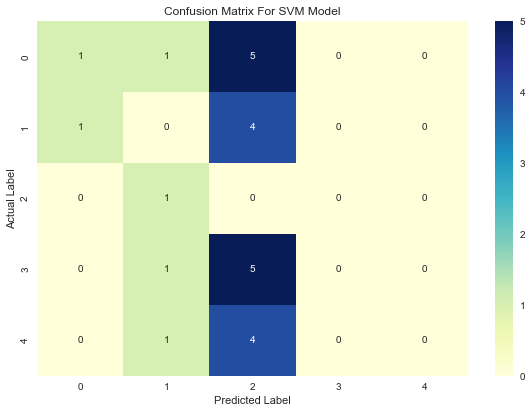

In [12]:
#...........................Using SVM Model.....................................
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

svc = SVC(kernel = 'linear', C = 8, gamma = 12/160, probability=True)
SVM = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
SVM.fit(X_train, y_train)
SVM_Mbest = SVM.best_estimator_
SVM_pred_prob = SVM_Mbest.predict_proba(X_test)
SVM_Ypredict = SVM_Mbest.predict(X_test)

print("\nSVM Testing Accuracy:",metrics.accuracy_score(y_test, SVM_Ypredict))

# Plot SVM Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, SVM_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

 20.calculate the `precision score` of the classifier using `precision_score`.

In [13]:
# Calculating the precision score of classifier
print(f"Precision Score of SVM is: {precision_score(y_test, SVM_Ypredict, average='weighted')}")

Precision Score of SVM is: 0.14583333333333334


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 21.**Applying Random Forest model**
 
 22.using `scikit-learn's RandomForestClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters   for your random forest model.

 23.Make dictionary of hyperparameters to search over, including the number of trees in the forest, the maximum number of         features to consider for splitting each tree, the maximum depth of the tree, and the criterion to use for splitting.

 25.After fitting the random forest model with the training data and finding the best estimator using GridSearchCV, use the `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted     labels of the test set.

 26.Finally, use `scikit-learn's metrics` module to calculate the accuracy score of your random forest model on the test set,  and plotting a confusion matrix using seaborn to visualize the performance of your model.


Random Forest Testing Accuracy: 0.875


Text(0.5, 29.5, 'Predicted Label')

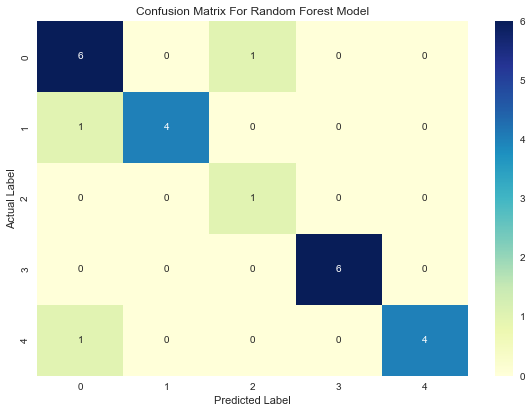

In [14]:
from sklearn.ensemble import RandomForestClassifier
# .........................Using Random Forest Model.....................
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF_model= RandomForestClassifier(random_state=42)
RF = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 5)
RF.fit(X_train,y_train)
RF_Mbest = RF.best_estimator_
RF_pred_prob = RF_Mbest.predict_proba(X_test)
RF_Ypredict = RF_Mbest.predict(X_test)

print("\nRandom Forest Testing Accuracy:",metrics.accuracy_score(y_test, RF_Ypredict))

#Plot Random Forest Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, RF_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()  
plt.title('Confusion Matrix For Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

 27.calculate the `precision score` of the classifier using `precision_score`.

In [17]:
# Calculating the precision score of classifier
print(f"Precision Score of Random Forest is: {precision_score(y_test, RF_Ypredict, average='weighted')}")

Precision Score of Random Forest is: 0.90625


 28.**Applying  Decision Tree model**
 
 29.using `scikit-learn's DecisionTreeClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters   for your decision tree model.
 
 30.Make dictionary of hyperparameters to search over, including the criterion to use for splitting, the maximum depth of the     tree, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a   leaf node. 

 31.After fitting the decision tree model with the training data and finding the best estimator using GridSearchCV, using the `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted     labels of the test set. 

 32.use `scikit-learn's metrics` module to calculate the accuracy score of your decision tree model on the test set, and         plotting a confusion matrix using `seaborn` to visualize the performance of your model.


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Decision Tree Testing Accuracy: 0.625


Text(0.5, 29.5, 'Predicted Label')

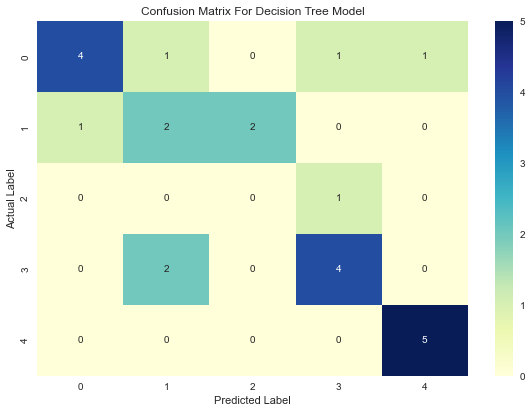

In [31]:
from sklearn.tree import DecisionTreeClassifier 
# .........................Using Decision Tree Model...........................
param_dict ={
    "criterion":['gini','entropy'],
    "max_depth":(150, 155, 160),
    "min_samples_leaf":range(1,5)
 }
DT_model= DecisionTreeClassifier(random_state=42)
DT = GridSearchCV(DT_model,
                    param_grid=param_dict,
                    cv=5,                  # 5-Fold Cross Validation
                    verbose=1,
                    n_jobs=-1) 

DT.fit(X_train,y_train)
DT_Mbest = DT.best_estimator_
DT_pred_prob = DT_Mbest.predict_proba(X_test)
DT_Ypredict = DT_Mbest.predict(X_test)

print("\nDecision Tree Testing Accuracy:",metrics.accuracy_score(y_test, DT_Ypredict))

#Plot Decision Tree Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, DT_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Decision Tree Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


 33.calculate the `precision score` of the classifier using `precision_score`.

In [32]:
# Calculating the precision score of classifier
print(f"Precision Score of Decision Tree is: {precision_score(y_test, DT_Ypredict, average='weighted')}")

Precision Score of Decision Tree is: 0.6569444444444446


 34.**Applying Logistic Regression  model**
 
 35.using `scikit-learn's LogisticRegression` and `GridSearchCV `to perform a grid search to find the best hyperparameters for your logistic regression model.

 36.Make dictionary of hyperparameters to search over, including the regularization penalty (L2) and the inverse of regularization strength (C).

 37.After fitting the logistic regression model with the training data and finding the best estimator using GridSearchCV, use the `predict_proba`method to get the predicted probabilities of the test set and predict method to get the predicted labels of the test set.

 38.Finally, use `scikit-learn's metrics module` to calculate the accuracy score of your logistic regression model on the test set, and plotting a confusion matrix using `seaborn` to visualize the performance of your model.

C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-


Logistic Regression Testing Accuracy: 0.4166666666666667


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 29.5, 'Predicted Label')

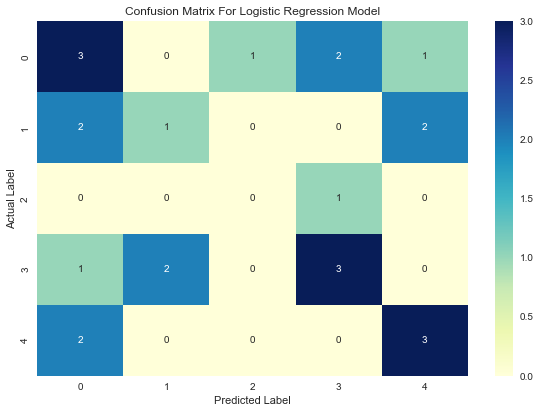

In [33]:
from sklearn.linear_model import LogisticRegression
# .........................Using Logistic Regression Model.....................
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
LR_model= LogisticRegression(random_state=42)
LR = GridSearchCV(LR_model, param_grid=grid_values)
LR.fit(X_train,y_train)
LR_Mbest = LR.best_estimator_
LR_pred_prob = LR_Mbest.predict_proba(X_test)
LR_Ypredict = LR_Mbest.predict(X_test)
print("\nLogistic Regression Testing Accuracy:",metrics.accuracy_score(y_test, LR_Ypredict))

#Plot Logistic Regression Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, LR_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


 39.calculate the `precision score` of the classifier using `precision_score`.

In [34]:
# Calculating the precision score of classifier
print(f"Precision Score of Logistic Regression is: {precision_score(y_test, LR_Ypredict, average='weighted')}")

Precision Score of Logistic Regression is: 0.4079861111111111


 40.**Applying KNN model**

  41.using `scikit-learn's` `KNeighborsClassifier` and `GridSearchCV` to perform a grid search to find the best hyperparameters        for your KNN model. 

  42.After fitting the KNN model with the training data and finding the best estimator using GridSearchCV, use the        `predict_proba` method to get the predicted probabilities of the test set and predict method to get the predicted labels of      the test set. 

  43.Finally, use `scikit-learn's metrics` module to calculate the accuracy score of your KNN model on the test set, and           plotting a confusion matrix using `seaborn` to visualize the performance of your model.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac


KNN Testing Accuracy: 0.9583333333333334


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Text(0.5, 29.5, 'Predicted Label')

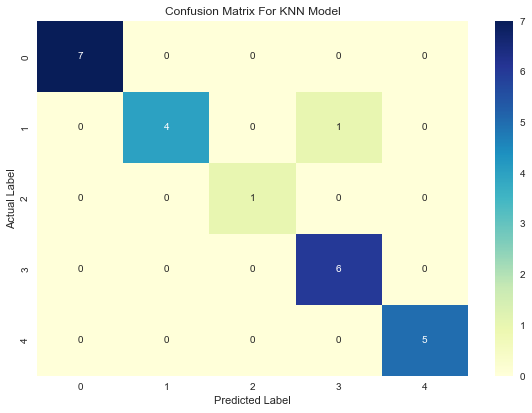

In [35]:
from sklearn.neighbors import KNeighborsClassifier
#...........................Using KNN Model.....................................
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


KNN = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy', return_train_score=False,verbose=1)
KNN.fit(X_train, y_train)
KNN_Mbest = KNN.best_estimator_
KNN_pred_prob = KNN_Mbest.predict_proba(X_test)
KNN_Ypredict = KNN_Mbest.predict(X_test)

print("\nKNN Testing Accuracy:",metrics.accuracy_score(y_test, KNN_Ypredict))

# Plot KNN Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, KNN_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For KNN Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



 44.calculate the `precision score` of the classifier using `precision_score`.

In [36]:
# Calculating the precision score of classifier
print(f"Precision Score of the kNN is: {precision_score(y_test, KNN_Ypredict, average='weighted')}")

Precision Score of the kNN is: 0.9642857142857143


45.Now repaet all the above steps but for `independents_sffs`.

In [37]:
independents=independents_sffs.drop(['target'],axis='columns')
dependent=independents_sffs.target
#Split data 20% testing and 80% training
X_train, X_test, y_train, y_test = train_test_split(independents, dependent, test_size=0.2, random_state=42) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.316 total time=   4.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.632 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.632 total time=   3.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.526 total time=   2.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.500 total time=   0.6s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.316 total time=   4.8s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.632 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.632 total time=   3.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.526 total time=   3.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.500 total time=   0.6s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

Text(0.5, 29.5, 'Predicted Label')

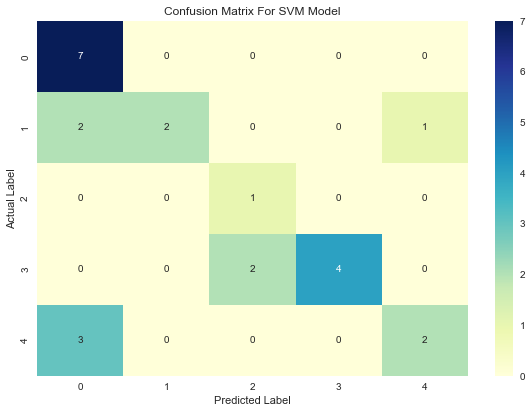

In [38]:
#...........................Using SVM Model.....................................
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  

svc = SVC(kernel = 'linear', C = 8, gamma = 12/160, probability=True)
SVM = GridSearchCV(svc, param_grid, refit = True, verbose = 3) 
SVM.fit(X_train, y_train)
SVM_Mbest = SVM.best_estimator_
SVM_pred_prob = SVM_Mbest.predict_proba(X_test)
SVM_Ypredict = SVM_Mbest.predict(X_test)

print("\nSVM Testing Accuracy:",metrics.accuracy_score(y_test, SVM_Ypredict))
# Calculating the precision score of classifier
print(f"Precision Score of SVM is: {precision_score(y_test, SVM_Ypredict, average='weighted')}")

# Plot SVM Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, SVM_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


Random Forest Testing Accuracy: 0.8333333333333334
Precision Score of RF is: 0.8601190476190476


Text(0.5, 29.5, 'Predicted Label')

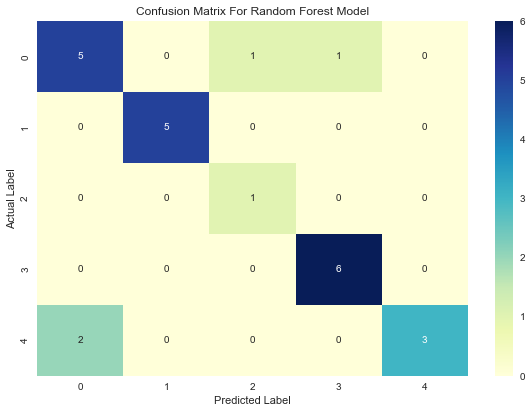

In [25]:
from sklearn.ensemble import RandomForestClassifier
# .........................Using Random Forest Model.....................
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF_model= RandomForestClassifier(random_state=42)
RF = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv= 5)
RF.fit(X_train,y_train)
RF_Mbest = RF.best_estimator_
RF_pred_prob = RF_Mbest.predict_proba(X_test)
RF_Ypredict = RF_Mbest.predict(X_test)

print("\nRandom Forest Testing Accuracy:",metrics.accuracy_score(y_test, RF_Ypredict))
# Calculating the precision score of classifier
print(f"Precision Score of RF is: {precision_score(y_test, RF_Ypredict, average='weighted')}")

#Plot Random Forest Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, RF_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()  
plt.title('Confusion Matrix For Random Forest Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Decision Tree Testing Accuracy: 0.625
Precision Score of DT is: 0.6569444444444446


Text(0.5, 29.5, 'Predicted Label')

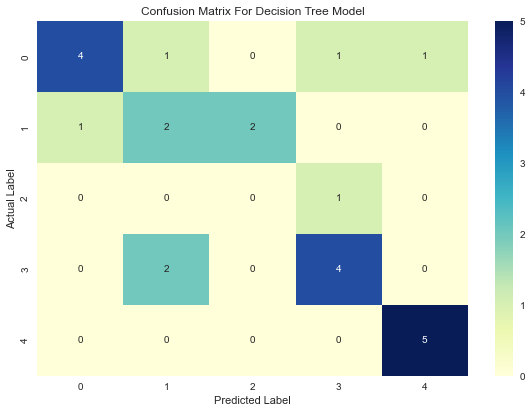

In [29]:
from sklearn.tree import DecisionTreeClassifier 
# .........................Using Decision Tree Model...........................
param_dict ={
    "criterion":['gini','entropy'],
    "max_depth":(150, 155, 160),
    "min_samples_leaf":range(1,5)
 }
DT_model= DecisionTreeClassifier(random_state=42)
DT = GridSearchCV(DT_model,
                    param_grid=param_dict,
                    cv=5,                  # 5-Fold Cross Validation
                    verbose=1,
                    n_jobs=-1) 

DT.fit(X_train,y_train)
DT_Mbest = DT.best_estimator_
DT_pred_prob = DT_Mbest.predict_proba(X_test)
DT_Ypredict = DT_Mbest.predict(X_test)

print("\nDecision Tree Testing Accuracy:",metrics.accuracy_score(y_test, DT_Ypredict))
# Calculating the precision score of classifier
print(f"Precision Score of DT is: {precision_score(y_test, DT_Ypredict, average='weighted')}")

#Plot Decision Tree Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, DT_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Decision Tree Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-


Logistic Regression Testing Accuracy: 0.4166666666666667
Precision Score of LR is: 0.4079861111111111


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Text(0.5, 29.5, 'Predicted Label')

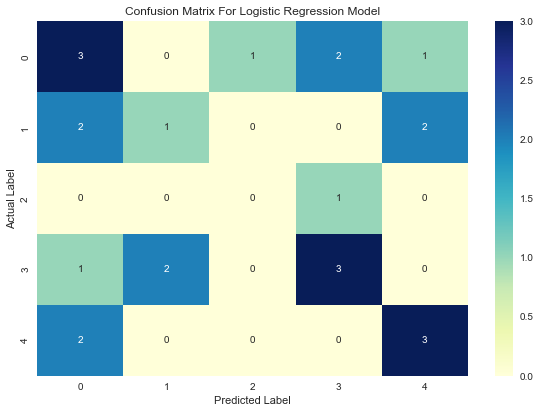

In [30]:
from sklearn.linear_model import LogisticRegression
# .........................Using Logistic Regression Model.....................
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
LR_model= LogisticRegression(random_state=42)
LR = GridSearchCV(LR_model, param_grid=grid_values)
LR.fit(X_train,y_train)
LR_Mbest = LR.best_estimator_
LR_pred_prob = LR_Mbest.predict_proba(X_test)
LR_Ypredict = LR_Mbest.predict(X_test)
print("\nLogistic Regression Testing Accuracy:",metrics.accuracy_score(y_test, LR_Ypredict))
# Calculating the precision score of classifier
print(f"Precision Score of LR is: {precision_score(y_test, LR_Ypredict, average='weighted')}")

#Plot Logistic Regression Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, LR_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For Logistic Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac


KNN Testing Accuracy: 0.9583333333333334
Precision Score of KNN is: 0.9642857142857143


C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\smsm\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Text(0.5, 29.5, 'Predicted Label')

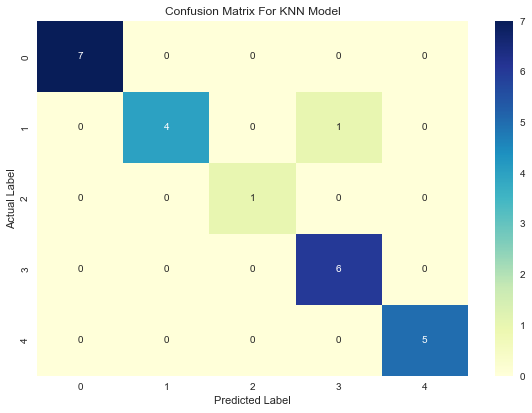

In [28]:
from sklearn.neighbors import KNeighborsClassifier
#...........................Using KNN Model.....................................
knn = KNeighborsClassifier(n_neighbors=5)
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)


KNN = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy', return_train_score=False,verbose=1)
KNN.fit(X_train, y_train)
KNN_Mbest = KNN.best_estimator_
KNN_pred_prob = KNN_Mbest.predict_proba(X_test)
KNN_Ypredict = KNN_Mbest.predict(X_test)

print("\nKNN Testing Accuracy:",metrics.accuracy_score(y_test, KNN_Ypredict))
# Calculating the precision score of classifier
print(f"Precision Score of KNN is: {precision_score(y_test, KNN_Ypredict, average='weighted')}")

# Plot KNN Accuracy
class_names=[0,1,2,3,4]        # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cnf_matrix = metrics.confusion_matrix(y_test, KNN_Ypredict)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion Matrix For KNN Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

